In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os
#처음 연결할 경우에만 사용
#path = '/content/gdrive/MyDrive/MachineVision'
#os.mkdir(path)
!pip install opencv-contrib-python==4.4.0.44

     |████████████████████████████████| 55.7 MB 1.4 MB/s 
  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


In [3]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv_imshow

import subprocess
subprocess.call("pip install -U opencv-python".split())

0

In [13]:
img = cv.resize(cv.imread('/content/gdrive/MyDrive/MachineVision/HW4_image/bridge.jpg'),dsize=(640, 480))
img2 = cv.rotate(img, cv.ROTATE_90_CLOCKWISE)
img3 = cv.resize(img, dsize=(0,0), fx=2.0, fy=2.0)

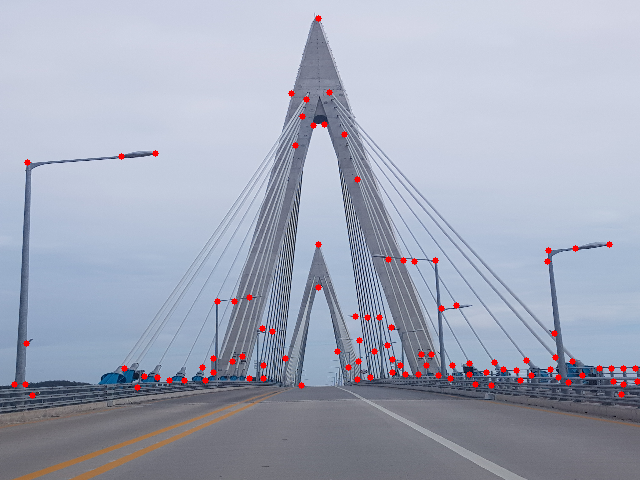

True

In [14]:
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray = np.float32(gray)

corners = cv.goodFeaturesToTrack(gray, maxCorners=100, qualityLevel=0.1, minDistance=10)

for c in corners:
  x,y = c.ravel()
  cv.circle(img, (x,y),3,(0,0,255), -1)
cv_imshow(img)
cv.imwrite('/content/gdrive/MyDrive/MachineVision/HW4_result/result1_1.jpg',img)

In [15]:
gray = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)
gray = np.float32(gray)

corners = cv.goodFeaturesToTrack(gray, maxCorners=100, qualityLevel=0.1, minDistance=10)

for c in corners:
  x,y = c.ravel()
  cv.circle(img2, (x,y),3,(0,0,255), -1)
cv_imshow(img2)
cv.imwrite('/content/gdrive/MyDrive/MachineVision/HW4_result/result1_2.jpg',img)

True

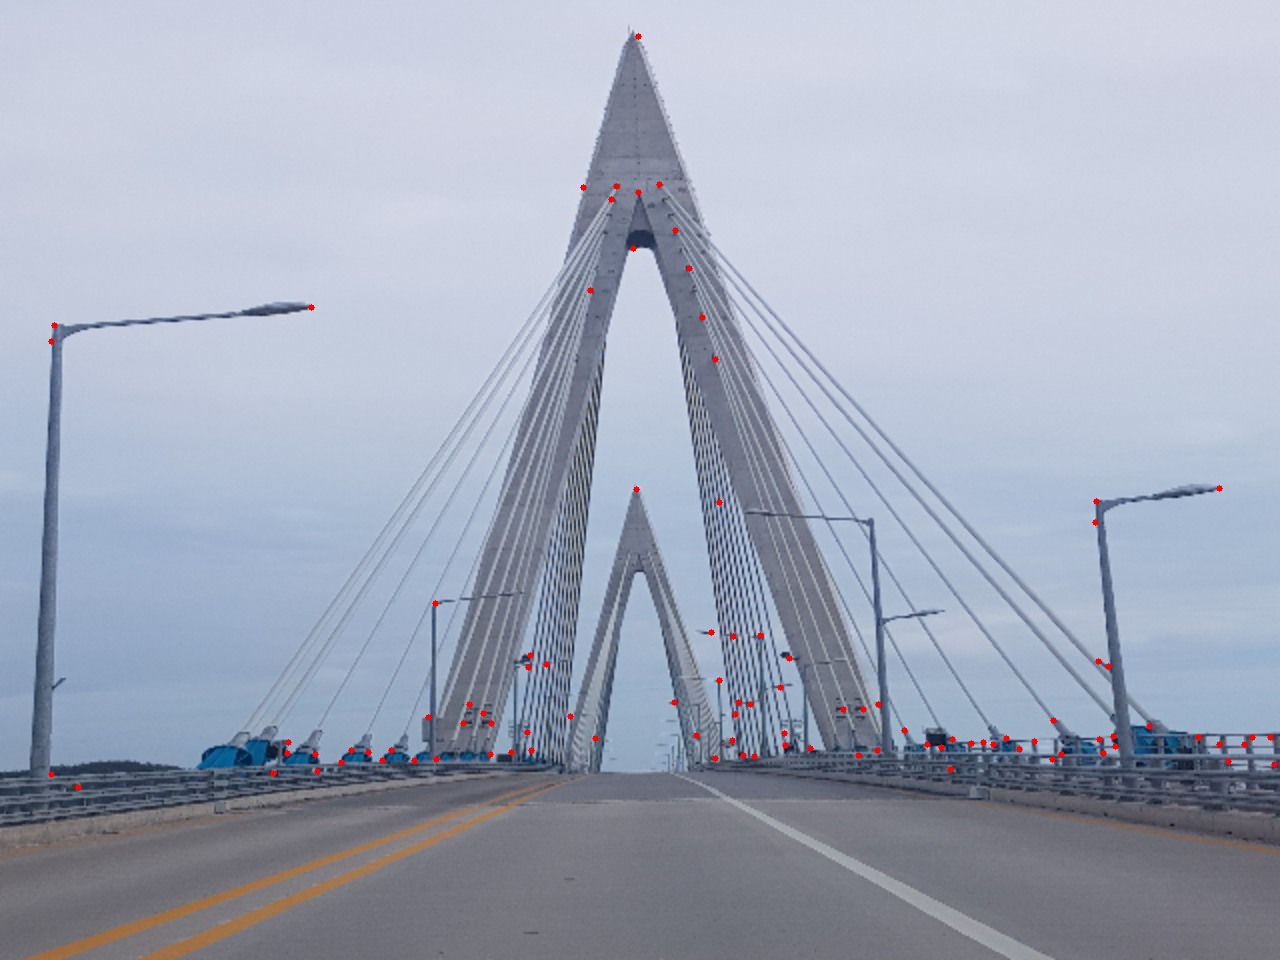

True

In [16]:
gray = cv.cvtColor(img3, cv.COLOR_BGR2GRAY)
gray = np.float32(gray)

corners = cv.goodFeaturesToTrack(gray, maxCorners=100, qualityLevel=0.1, minDistance=10)

for c in corners:
  x,y = c.ravel()
  cv.circle(img3, (x,y),3,(0,0,255), -1)
cv_imshow(img3)
cv.imwrite('/content/gdrive/MyDrive/MachineVision/HW4_result/result1_3.jpg',img)

In [12]:
print(img.shape)
print(img2.shape)
print(img3.shape)

(480, 640, 3)
(640, 480, 3)
(960, 1280, 3)


In [61]:
origin_img = cv.resize(cv.imread('/content/gdrive/MyDrive/MachineVision/HW4_image/London2.jpg'), dsize=(640,480))

In [62]:
img2_1 = origin_img
gray = cv.cvtColor(img2_1, cv.COLOR_BGR2GRAY)

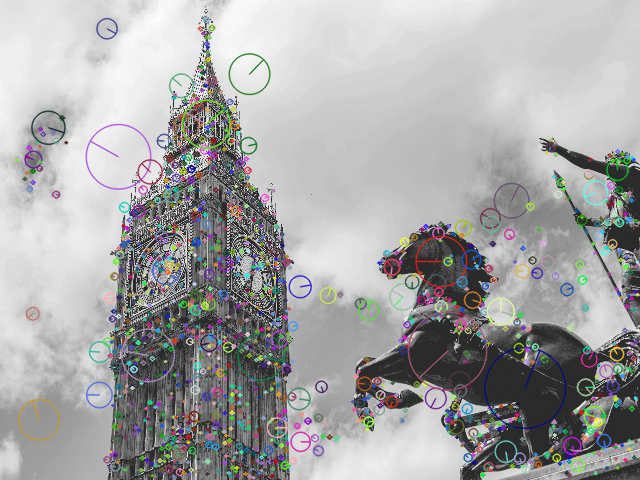

In [63]:
sift = cv.SIFT_create ()
kp = sift.detect(gray,None)
img2_1 = cv.drawKeypoints(gray,kp,img, flags = cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv_imshow(img2_1)

In [64]:
img2_2 = cv.rotate(origin_img,cv.ROTATE_90_CLOCKWISE)
gray2 = cv.cvtColor(img2_2, cv.COLOR_BGR2GRAY)

In [65]:
sift = cv.SIFT_create ()
kp = sift.detect(gray2,None)
img2_2 = cv.drawKeypoints(gray2,kp,img, flags = cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv_imshow(img2_2)

In [66]:
img2_3 = cv.resize(origin_img,dsize=(0,0), fx=2.0, fy=2.0)
gray3 = cv.cvtColor(img2_3, cv.COLOR_BGR2GRAY)

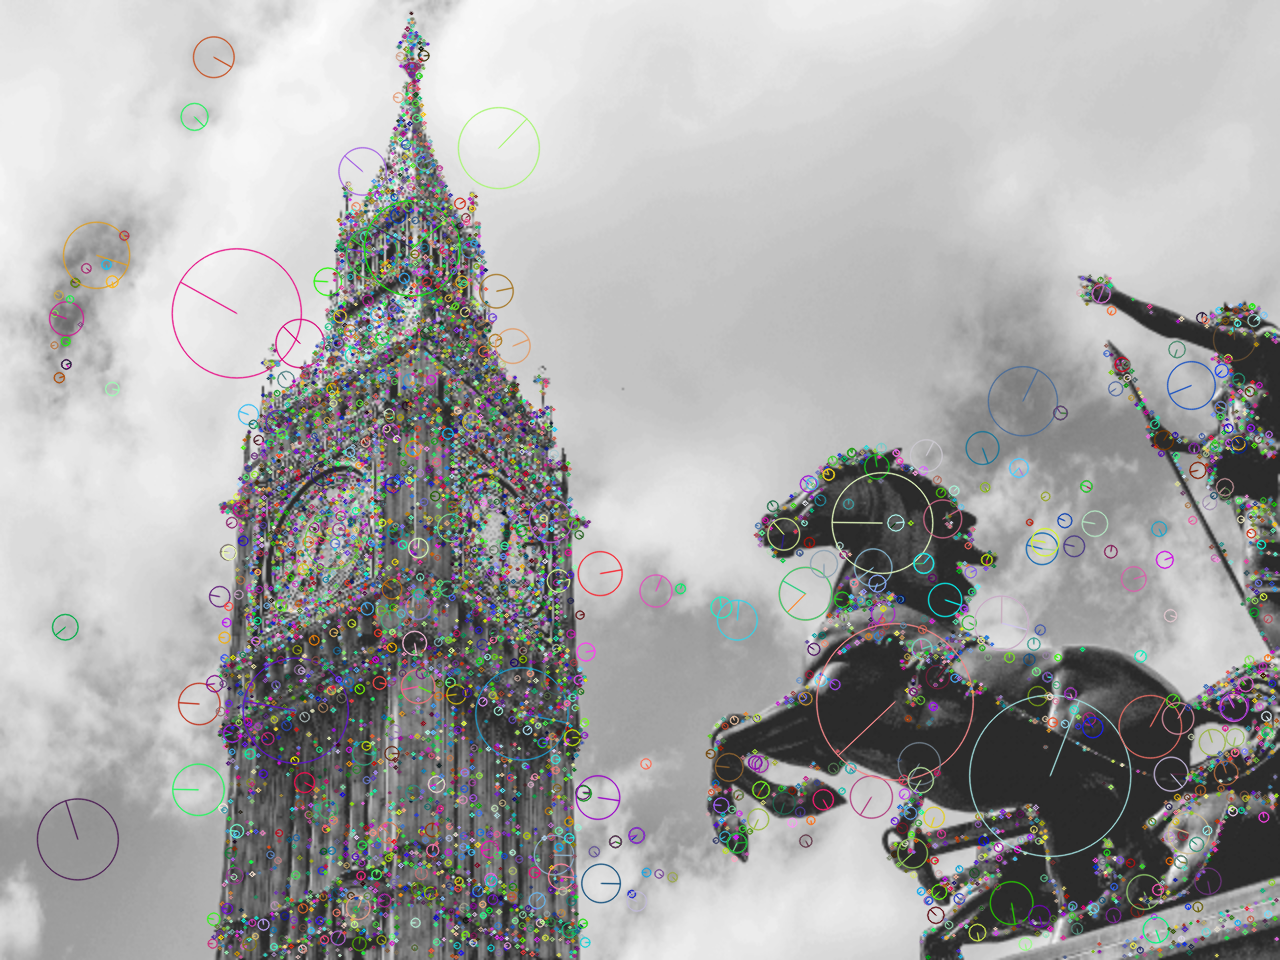

In [67]:
sift = cv.SIFT_create ()
kp = sift.detect(gray3,None)
img2_3 = cv.drawKeypoints(gray3,kp,img, flags = cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv_imshow(img2_3)

In [68]:
img3_1 = cv.resize(cv.imread('/content/gdrive/MyDrive/MachineVision/HW4_image/book_single.jpg'),dsize)
img3_2 = cv.imread('/content/gdrive/MyDrive/MachineVision/HW4_image/book_multiple1.jpg')
gray3_1 = cv.cvtColor(img3_1, cv.COLOR_BGR2GRAY)
gray3_2 = cv.cvtColor(img3_2, cv.COLOR_BGR2GRAY)

In [69]:
sift = cv.SIFT_create ()
kp3_1 = sift.detect(gray3_1,None)
img3_1_blob = cv.drawKeypoints(gray3_1,kp3_1,img, flags = cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv_imshow(img3_1_blob)

kp3_2 = sift.detect(gray3_2,None)
img3_2_blob = cv.drawKeypoints(gray3_2,kp3_2,img, flags = cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv_imshow(img3_2_blob)

In [ ]:
sift = cv.SIFT_create()
kp3_1,des3_1 = sift.detectAndCompute(img3_1, None)
kp3_2, des3_2 = sift.detectAndCompute(img3_2, None)

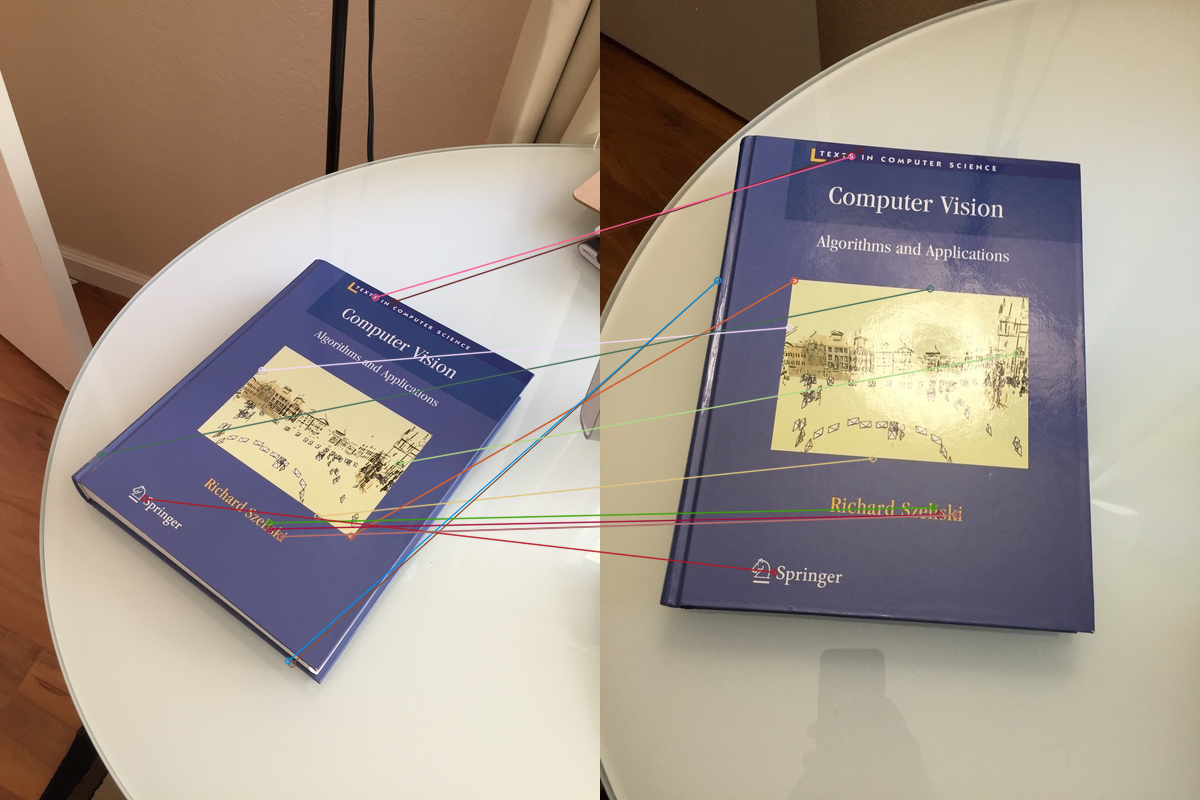

In [ ]:
bf = cv.BFMatcher()
matches = bf.match(des3_1,des3_2)
matches = sorted(matches, key = lambda x:x.distance)
img3_3 = cv.drawMatches(img3_1, kp3_1, img3_2, kp3_2, matches[:15], None, 
                        flags = cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
cv_imshow(img3_3)

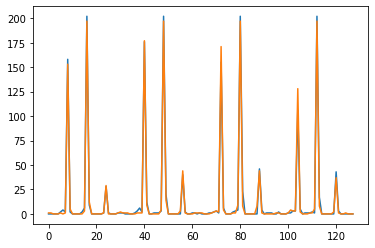

([<matplotlib.lines.Line2D at 0x7f5ba72d1090>], None)

In [ ]:
import matplotlib.pyplot as plt
plt.plot(np.arange(128),des3_1[matches[0].queryIdx])
plt.plot(np.arange(128),des3_2[matches[0].trainIdx]), plt.show()
plt.plot(np.arange(128),des3_1[matches[0].queryIdx])
plt.plot(np.arange(128),des3_2[matches[10].trainIdx]), plt.show()

In [ ]:
#cv.imwrite('/content/gdrive/MyDrive/MachineVision/HW1_result/result'+str(i)+'.jpg',img)